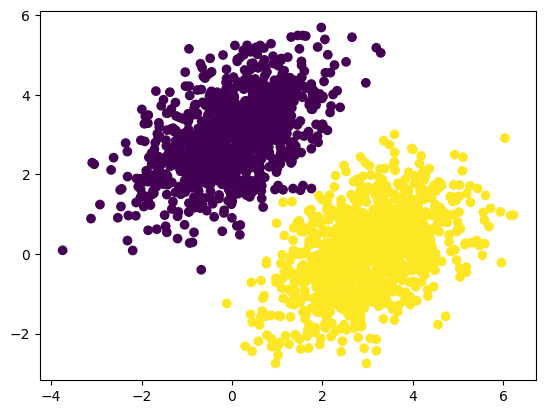

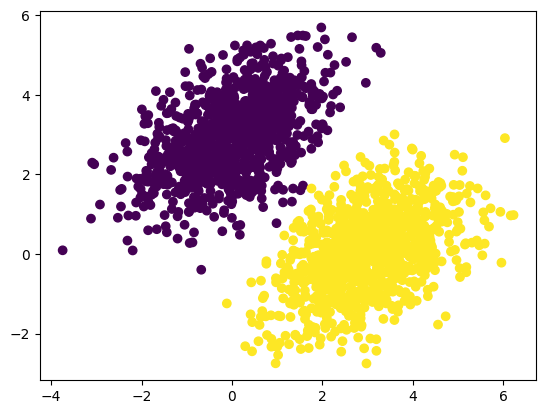

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# the above generates 2 point clouds, 2 classes of random points in a 2D plan. Both are arrays of the form (1000,2)

# stacking together yields a (2000, 2) array 
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32) 

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32"))) # 2 classes of points (can represent as class 0 or class 1)
# as we've stacked all of class 0 , then class 1, when crteating the sample data, expected output is all of first class, then second, thats what targets is

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]) 
plt.show()
# below is the synthetic data we have generated 

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) # remember, from tensor operation with w, this layer (one in this example) transforming tensor of rank 2 to rank 1
# initally, has random values -> will be altered as we do back propgation 
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# forward pass function, the one that does -> prediction = W * input + b
def model(inputs):
  return tf.matmul(inputs, W) + b # inputs are (x,y). So inputs is 1x2 and W is 2x1. So, output is a scalar (so is b), which is what we want

# loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions) 
  return tf.reduce_mean(per_sample_losses) # We need to average these per-sample loss scores into a single scalar loss value: this is what reduce_mean does.

# training step function 
learning_rate = 0.1

def training_step(inputs, targets): 
  with tf.GradientTape() as tape: 
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # find gradient for both W and b, for both tensors 
  W.assign_sub(grad_loss_wrt_W * learning_rate) # we take that direction, multiply by learning rate, and minus it from the tensor, this updates the weights of this layer 
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss

for step in range(40):
  loss = training_step(inputs, targets) 
#   print(f"Loss at step {step}: {loss:.4f}") # this shows us the loss for 40 iteratons. We can see it slows down to around 0.027


# lets see what the 
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) # points are "0" if prediction value is below 0.5 and "1" if its above 0.5
plt.show()

# done


